# 결측치, 누락값, 이상치

결측치 : 순수하게 na값 vs. na값 그 자체(설문조사에서 내가 선택하지 않은 문항이 존재할 경우)
누락값 : 휴먼에러로 인한 값 -> 누락 원인 파악

결측치, 누락값을 처리해야하는 이유
1. 분석에 방해가 됨
2. 머신에게 더 잘 학습시키기 위해
-> 결측치를 실제값과 유사하지 않게 처리하면 모델에 성능에 영향을 미친다.

결측치를 처리하는 방법
1. 전체 비중의 1% 미만이 경우 쉽게 버리기
2. 결측치가 전체의 30~40% 정도일 경우
-> 다 버릴 경우 머신에게 학습시킬 양이 줄어드는 것 = 성능에 영향이 있음
-> 결측치를 최대한 채울 수 있도록 한다.
3. 결측치가 전체의 80~90% 정도일 경우, 채울 수 없다면 버려도 상관 없음
4. 적절한 값으로 대체 ex) 평균
-> 단순하게 평균으로만 대체하면 문제가 있을 수 있음

결측치를 나타내는 용어
1. 완전 무작위 결측치(MCAR) : 인간의 편향이나 기계의 결함으로 인한 것인 아닌 완전히 무작위로 발생된 결측치
2. 무작위 결측치(MAR) : 어떤 상황으로 인해 발생한 결측치
3. 비무작위 결측치(NMAR) : 결측값이지만 그 자체로 하나의 특성이 되는 결측치(설문조사에서 답변을 하지 않은 경우)

### 결측치를 처리하는 방법
1. 결측치 제외하기
2. 적절한 값으로 대체하기(평균, 중위값 등)
3. 보간법(interpolation) - 선형보간법, spline 보간법, 시계열 보간법 등

In [5]:
conda update -n base -c conda-forge conda

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    async_generator-1.10       |             py_0          18 KB  conda-forge
    backports-1.0              |             py_2           4 KB  conda-forge
    backports.functools_lru_cache-1.6.5|     pyhd8ed1ab_0          11 KB  conda-forge
    backports.tempfile-1.0     |             py_0          10 KB  conda-forge
    backports.weakref-1.0.post1|  pyhd8ed1ab_1003          11 KB  conda-forge
    chardet-3.0.4              |        py38_1003         189 KB  conda-forge
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    conda-package-handling-2.2.0|     pyh38be061_0         249 KB  conda-forge
    con



==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda





conda-package-stream | 19 KB     |            |   0% 
conda-package-stream | 19 KB     | ########5  |  85% 
conda-package-stream | 19 KB     | ########## | 100% 

xlrd-1.2.0           | 108 KB    |            |   0% 
xlrd-1.2.0           | 108 KB    | #4         |  15% 
xlrd-1.2.0           | 108 KB    | ########## | 100% 
xlrd-1.2.0           | 108 KB    | ########## | 100% 

xmltodict-0.13.0     | 13 KB     |            |   0% 
xmltodict-0.13.0     | 13 KB     | ########## | 100% 

pluggy-0.13.1        | 29 KB     |            |   0% 
pluggy-0.13.1        | 29 KB     | #####6     |  56% 
pluggy-0.13.1        | 29 KB     | ########## | 100% 
pluggy-0.13.1        | 29 KB     | ########## | 100% 

backports.tempfile-1 | 10 KB     |            |   0% 
backports.tempfile-1 | 10 KB     | ########## | 100% 

importlib-metadata-2 | 28 KB     |            |   0% 
importlib-metadata-2 | 28 KB     | ########## | 100% 
importlib-metadata-2 | 28 KB     | ########## | 100% 

pexpect-4.8.0        

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('bike_sharing_daily.csv')
dfe = pd.read_csv('country_timeseries.csv')

In [15]:
df.isna().sum() #na값의 개수

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

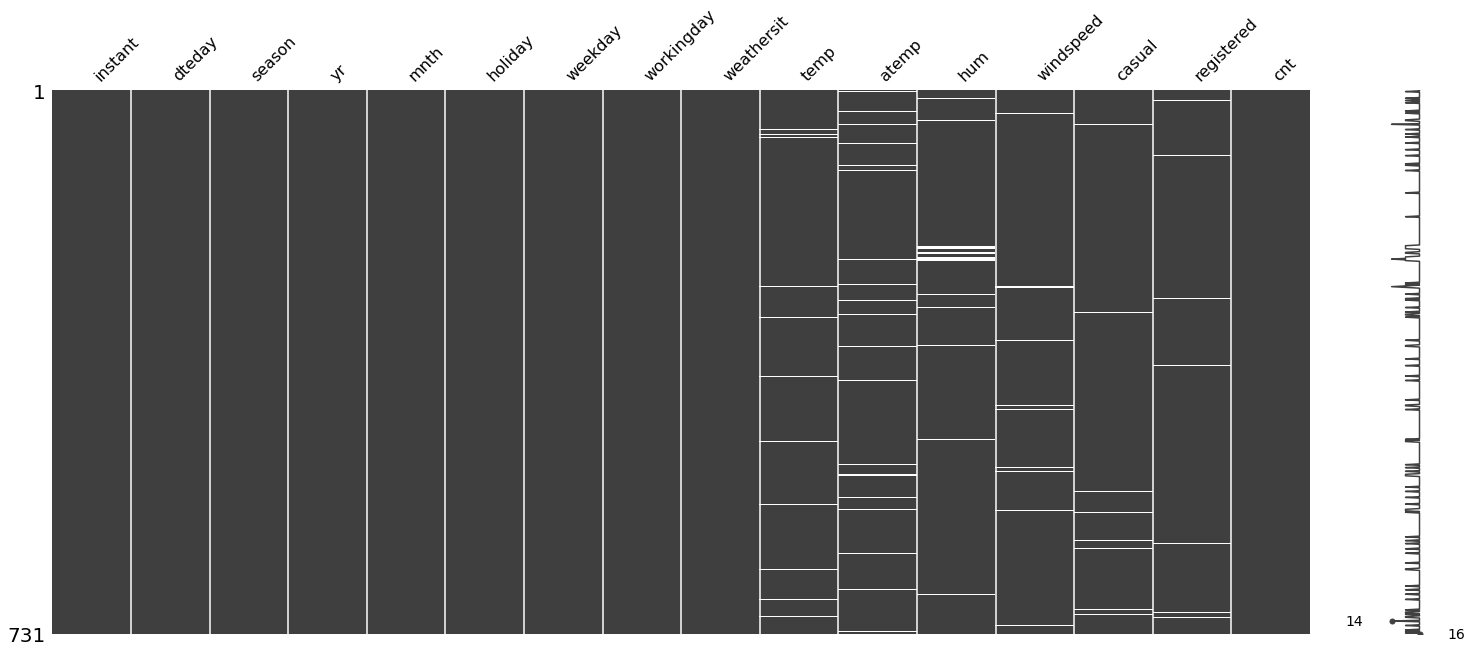

In [9]:
#결측치 시각화(df)
msno.matrix(df)
plt.show()

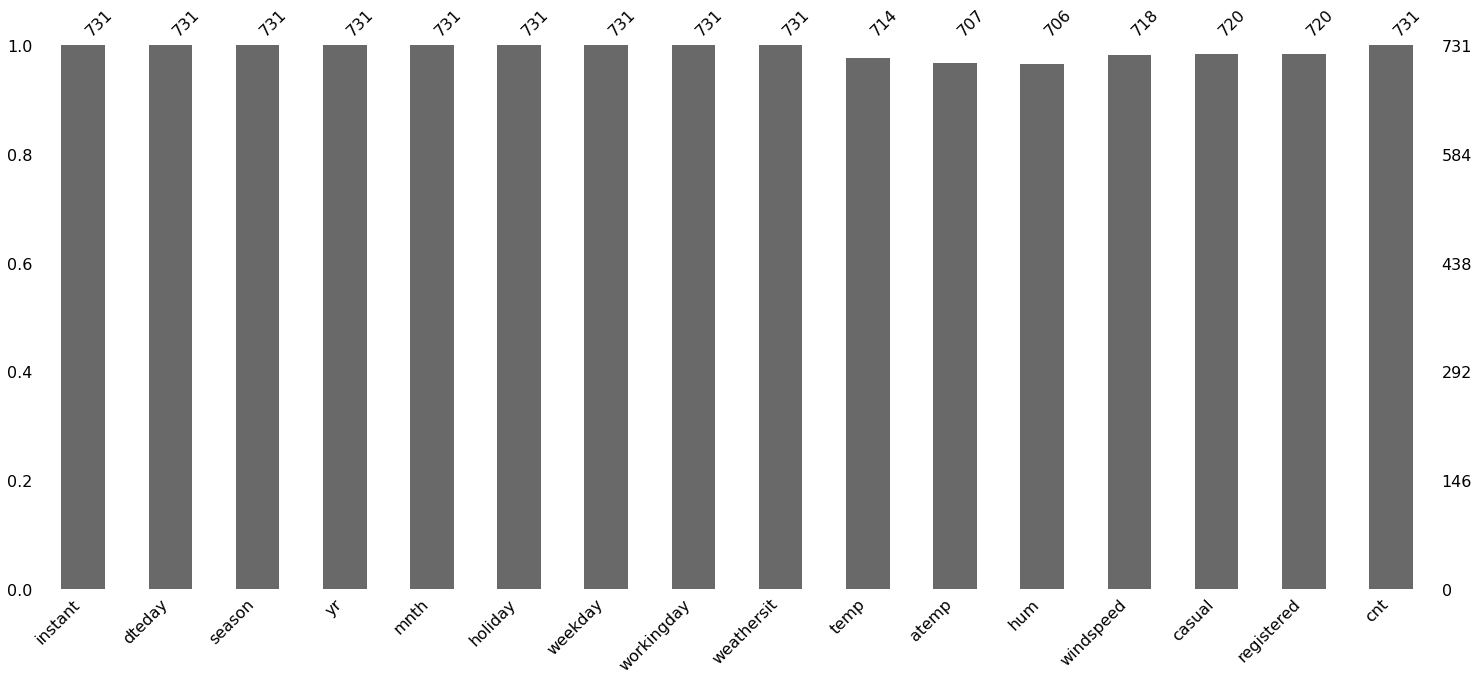

In [7]:
#막대그래프
msno.bar(df)
plt.show()

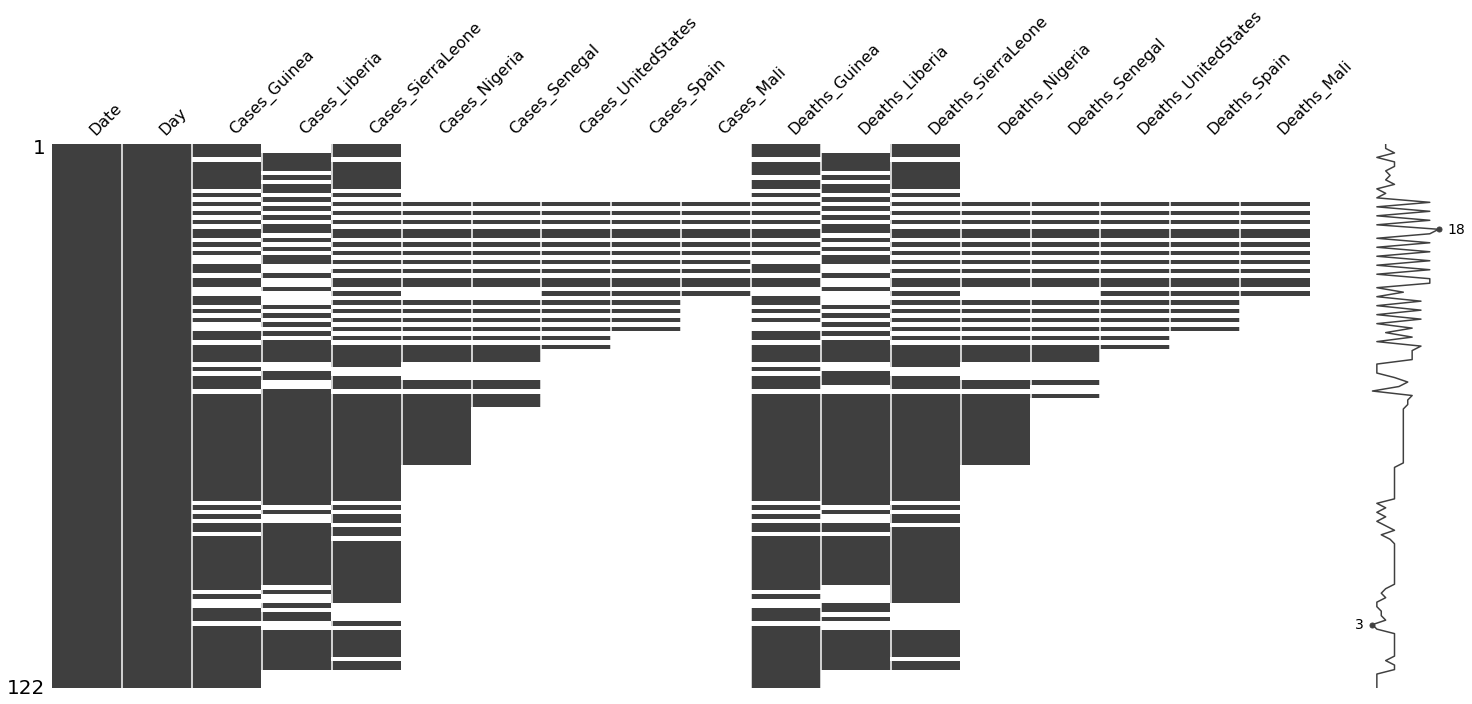

In [10]:
#결측치 시각화(dfe)
msno.matrix(dfe)
plt.show()

# 결측치를 대체하는 방법

In [9]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
ebola = dfe.iloc[0:15, 0:5]
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [11]:
ebola.dropna() #결측치 제거

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [23]:
CS_mean = ebola['Cases_SierraLeone'].mean()
CS_mean

9219.90909090909

In [13]:
#Cases_SierraLeone의 결측치를 평균인 9219.9090 으로 채우기
ebola['Cases_SierraLeone'].fillna(9219.9090).to_frame()

,Cases_SierraLeone
0,10030.000
1,9780.000
2,9722.000
3,9219.909
4,9633.000
5,9446.000
6,9409.000
7,9203.000
8,9004.000
9,8939.000


#### ffil : 누락값이 나타나기 전의 값으로 누락값을 변경
#### bfill : 누락값이 나타난 후 첫번째 값으로 누락값을 변경

In [14]:
ebola['Cases_SierraLeone'].fillna(method='ffill').to_frame()
# NaN값이 9722.0으로 대체됨

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9722.0
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


In [15]:
ebola['Cases_SierraLeone'].fillna(method='bfill').to_frame()
# NaN값이 9633.0으로 대체됨

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9633.0
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


## 보간법(interpolate)
문법 : interpolate(method=' ') -> 누락값 사이의 값을 평균으로 대체해서 만든다.

In [16]:
ebola['Cases_SierraLeone'].to_frame().interpolate()

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9677.5
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


### 보간법에 대해서

method must be one of

['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [29]:
ebola['Cases_SierraLeone'].interpolate(method='nearest').to_frame()
# 해당 누락값 이전의 가장 가까운 값으로 대체

,Cases_SierraLeone
0,10030.0
1,9780.0
2,9722.0
3,9722.0
4,9633.0
5,9446.0
6,9409.0
7,9203.0
8,9004.0
9,8939.0


<AxesSubplot:>

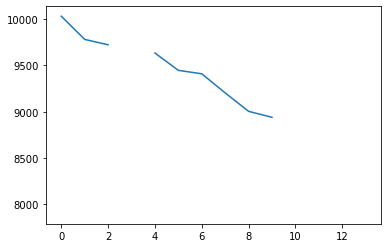

In [26]:
# ebola 데이터 그래프 그리기
ebola['Cases_SierraLeone'].plot()
# 결측값이 있으므로 중간이 끊겨있음

- 선형 보간법
- 두 점 사이의 거리를 구하는 공식
- 1차원의 두 점 사이의 거리로 누락값을 대체

<AxesSubplot:>

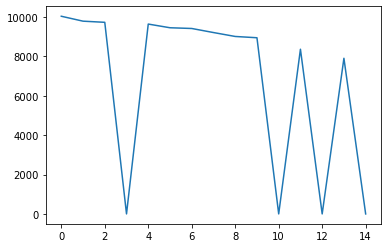

In [25]:
ebola['Cases_SierraLeone'].fillna(0).plot()
# 결측값 0으로 대체 후 그래프 그리기

<AxesSubplot:>

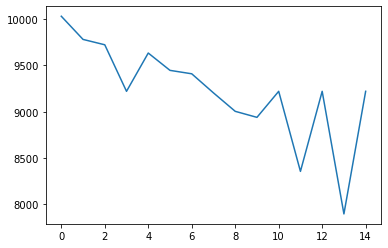

In [24]:
ebola['Cases_SierraLeone'].fillna(CS_mean).plot()

<AxesSubplot:>

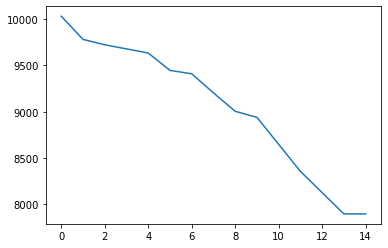

In [30]:
ebola['Cases_SierraLeone'].interpolate(method='linear').plot()

<AxesSubplot:>

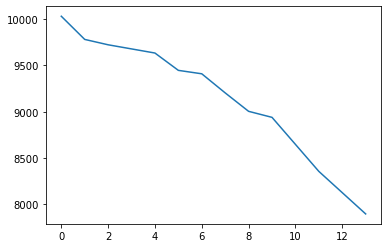

In [31]:
ebola['Cases_SierraLeone'].interpolate(method='slinear').plot()
# 2차항 보간법

<AxesSubplot:>

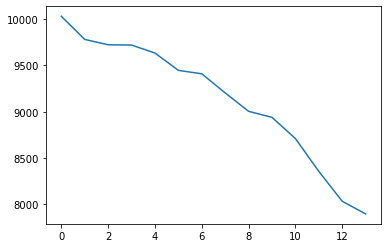

In [33]:
ebola['Cases_SierraLeone'].interpolate(method='cubic').plot()
# 3차 보간법

<AxesSubplot:>

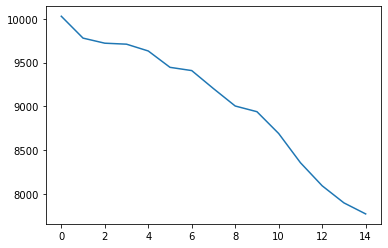

In [36]:
# spline
# 차수를 높여 2차원 이상에서 보간
# order로 차수 지정
ebola['Cases_SierraLeone'].interpolate(method='spline', order=2).plot()

In [12]:
dfe['Date'] = pd.to_datetime(dfe['Date'])
df_e = dfe.set_index('Date')
df_e
# dfe의 index를 'Date'로 지정

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,
2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [14]:
df_e.iloc[0:15, 0:5]['Cases_SierraLeone'].interpolate(method='time').to_frame()
# 시간에 따른 결측치 대체(양쪽의 값을 가지고 결측치 대체)

,Cases_SierraLeone
Date,
2015-01-05,10030.000000
2015-01-04,9780.000000
2015-01-03,9722.000000
2015-01-02,9692.333333
2014-12-31,9633.000000
2014-12-28,9446.000000
2014-12-27,9409.000000
2014-12-24,9203.000000
2014-12-21,9004.000000
